In [1]:
#付録14.A

%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, date
import pandas as pd
import csv
import numpy as np

def readcsv(file_name):
    trades=[]
    with open(file_name,'r') as f:
        series=csv.reader(f)
        n=0
        for line in series:
            trades.append([])
            for elements in line:
                trades[n].append(elements)
            n=n+1
    f.close()
    return trades

In [2]:
#付録14.B 立会ごとのデータの抽出
def sessiondata(trades,n_max,i,yymmdd,hm):
    j=0
    if hm==1900:# 米国時間、日本時間朝9：00
        jmax=0
        p99=float(trades[i][2])
        for j in range(n_max-i-1):
            yymmdd9=int(trades[i+j+1][0])
            hm9=int(trades[i+j+1][1])
            p9=float(trades[i+j+1][2])
            if yymmdd9>yymmdd:#実際の引けは日本時間午後3:15。
                if hm9<=110:                        
                    jmax=j
                if hm9>115:#実際の引けは日本時間午後3:15。
                    break
        price=trades[i:i+jmax+1]#抽出データの格納
    if hm==230:#日本時間午後4：30
        jmax=0
        p99=float(trades[i][2])
        for j in range(n_max-i-1):
            p9=float(trades[i+j+1][2])
            hm9=int(trades[i+j+1][1])
            if hm9<=1255:#日本時間朝2時55分
                jmax=j
            if hm9>1300:#日本時間朝3時
                break
        price=trades[i:i+jmax+1]#抽出データの格納
    return price,j

('20150731', 3254183)


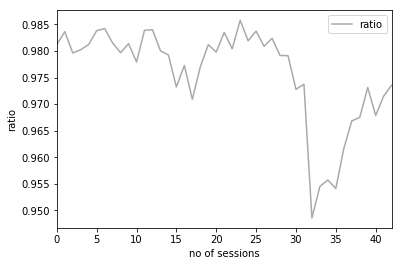

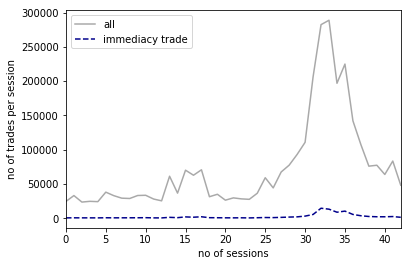

In [3]:
#付録14.C  緊急性取引 vs 非緊急性取引　取引数
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    ratio=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            price,j=sessiondata(trades,n_max,i,yymmdd,hm)
            if hm==1900 or hm==230:#データの分析-----------------------------
                trade0=price[0][2]
                dp0=0
                price2=[] #動きのある価格を保存
                length=len(price)
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    if trade!=trade0:#価格の動きのない取引を除外
                        price2.append(trade)   
                    trade0=trade
                price3=[] #動きのある価格の内マーケットメーカ等のトレードを除外
                for ii in range(2,len(price2)):
                    trade00=float(price2[ii-2])
                    trade0=float(price2[ii-1])
                    trade=float(price2[ii])
                    if abs(trade0-trade)==5:
                        if trade==trade00:
                            pass
                        else:
                            price3.append(trade)
                    else:
                        price3.append(trade)
                results.append([])
                results[t].append(length)
                results[t].append(len(price3))
                ratio.append(1-float(len(price3))/float(length))
                #緊急性取引・非緊急性取引の比率
                t+=1
            forward=i+j+1
    
    r=pd.DataFrame(ratio,columns=['ratio'])
    plt.figure(figsize=(7,4))
    r[:-1].plot(color='darkgray')
    plt.xlabel('no of sessions')
    plt.ylabel('ratio')

    results=pd.DataFrame(results,columns=['all','immediacy trade'])
    plt.figure(figsize=(7,4))
    results[:-1].plot(style=['-','--'],color=['darkgray','darkblue'])
    plt.xlabel('no of sessions')
    plt.ylabel('no of trades per session')

buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)   
    

('20150731', 3254183)


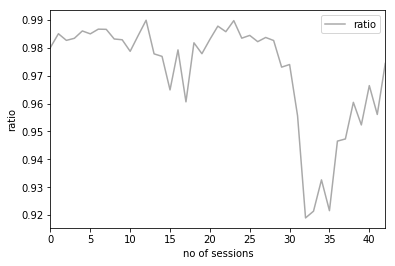

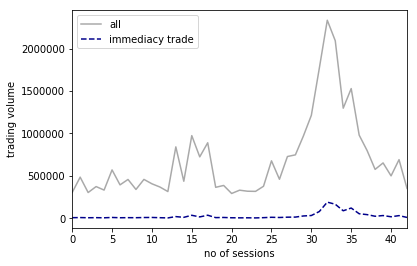

In [4]:
#14.D　緊急性取引 vs 非緊急性取引　取引枚数
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    ratio=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            price,j=sessiondata(trades,n_max,i,yymmdd,hm)
            if hm==1900 or hm==230:#データの分析-----------------------------
                trade0=price[0][2]
                dp0=0
                price2=[] #動きのある価格を保存
                length=len(price)
                volume=0
                volume2=0
                tt=0
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    v=int(price[ii][5])
                    volume+=v
                    if trade!=trade0:#価格の動きのない取引を除外
                        price2.append([])
                        price2[tt].append(trade)
                        price2[tt].append(v)
                        tt+=1
                    trade0=trade
                price3=[] #動きのある価格の内マーケットメーカ等のトレードを除外
                for ii in range(2,len(price2)):
                    trade00=float(price2[ii-2][0])
                    trade0=float(price2[ii-1][0])
                    trade=float(price2[ii][0])
                    v=float(price2[ii][1])
                    if abs(trade0-trade)==5:
                        if trade==trade00:
                            pass
                        else:
                            price3.append(trade)
                            volume2+=v
                    else:
                        price3.append(trade)
                        volume2+=v
                results.append([])
                #results[t].append(length)
                #results[t].append(len(price3))
                results[t].append(volume)
                results[t].append(volume2)
                ratio.append(1-float(volume2)/float(volume))
                t+=1
            forward=i+j+1
    r=pd.DataFrame(ratio,columns=['ratio'])
    plt.figure(figsize=(7,4))
    r[:-1].plot(color='darkgray')
    plt.xlabel('no of sessions')
    plt.ylabel('ratio')
    
    #results=pd.DataFrame(results,columns=['all','immediacy trade','volume','volume2'])
    results=pd.DataFrame(results,columns=['all','immediacy trade'])
    plt.figure(figsize=(7,4))
    results[:-1].plot(style=['-','--'],color=['darkgray','darkblue'])
    #results.volume2[:-1].plot()
    plt.xlabel('no of sessions')
    plt.ylabel('trading volume')
    
buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)  

('20150731', 3254183)


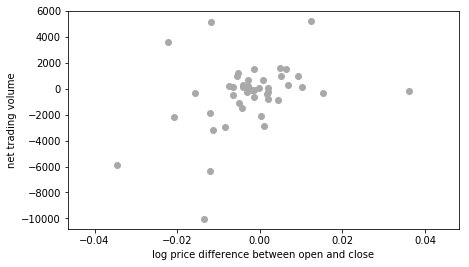

In [5]:
#14.E 緊急性取引 売り手主導・買い手主導
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    ratio=[]
    t=0
    tmp=0
    tmp2=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            price,j=sessiondata(trades,n_max,i,yymmdd,hm)
            if hm==1900 or hm==230:#データの分析-----------------------------
                trade0=float(price[0][2])
                p_open=trade0
                price2=[] #動きのある価格を保存
                length=len(price)
                volume2p=0
                volume2m=0
                uptick=0
                dwntick=0
                tt=0
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    bid=float(price[ii][3])   #買気配値
                    offer=float(price[ii][4]) #売気配値
                    v=int(price[ii][5])       #約定枚数
                    if trade!=trade0:        #価格の動きのない取引を除外
                        price2.append([])
                        price2[tt].append(trade)
                        price2[tt].append(bid)
                        price2[tt].append(offer)
                        price2[tt].append(v)
                        tt+=1
                    trade0=trade
                temp=0
                length=len(price2)
                for ii in range(2,length):
                    trade00=float(price2[ii-2][0])
                    trade0=float(price2[ii-1][0])
                    trade=float(price2[ii][0])
                    B=float(price2[ii][1])#買気配値
                    O=float(price2[ii][2])#売気配値
                    v=float(price2[ii][3])#約定毎数
                    tmp2+=v
                    if trade>trade0 and trade!=trade00:#買い手主導
                        volume2p+=v
                        uptick+=1
                    if trade<trade0 and trade!=trade00:#売り手主導
                        volume2m+=v
                        dwntick+=1
                results.append([])
                results[t].append(np.log(trade)-np.log(p_open))
                results[t].append((volume2p-volume2m))
                results[t].append((uptick-dwntick))
                t+=1
            forward=i+j+1
    results=pd.DataFrame(results,columns=['pgap','vgap','tgap'])
    plt.figure(figsize=(7,4))
    plt.scatter(results.pgap,results.vgap,color='darkgray')
    plt.xlabel('log price difference between open and close')
    plt.ylabel('net trading volume')

buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)  

('20150731', 3254183)
0.0


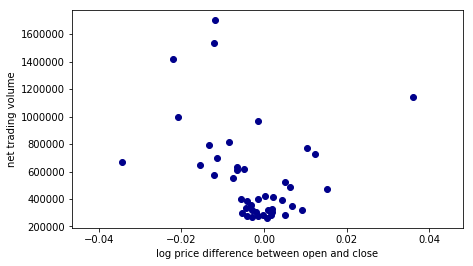

In [6]:
#14.F 非緊急性取引　EMOアルゴリズム
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    ratio=[]
    t=0
    tmp=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            price,j=sessiondata(trades,n_max,i,yymmdd,hm)
            if hm==1900 or hm==230:#データの分析-----------------------------
                trade0=float(price[0][2])
                p_open=trade0
                length=len(price)
                volume2p=0
                volume2m=0
                tt=0
                dp0=5
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    bid=float(price[ii][3])
                    offer=float(price[ii][4])
                    v=int(price[ii][5])
                    if trade==trade0:#価格の動きのある取引を除外
                        if trade==offer:
                            volume2p+=v
                        else:
                            if trade==bid:
                                volume2m+=v
                            else:
                                tmp+=1
                                if dp0>0:
                                    volume2p+=v
                                if dp0<0:
                                    volume2m+=v
                    else:
                        dp0=trade-trade0
                    trade0=trade
                results.append([])
                results[t].append(np.log(trade)-np.log(p_open))
                results[t].append((volume2p-volume2m))
                t+=1
            forward=i+j+1
    print(float(tmp)/float(n_max))
    results=pd.DataFrame(results,columns=['p_gap','gap'])
    plt.figure(figsize=(7,4))
    plt.scatter(results.p_gap,results.gap,color='darkblue')
    plt.xlabel('log price difference between open and close')
    plt.ylabel('net trading volume')
    plt.figure(figsize=(7,4))

buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)  

('20150731', 3254183)


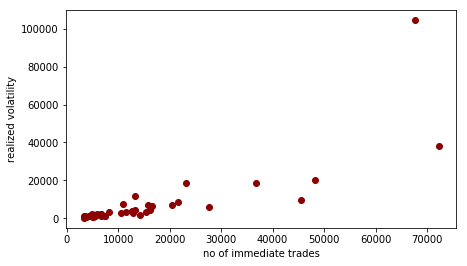

In [7]:
#14.G　実現ボラティリティと緊急性取引の取引回数
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    I=[]
    zN=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            price,j=sessiondata(trades,n_max,i,yymmdd,hm)
            if hm==1900 or hm==230:#データの分析-----------------------------
                length=len(price)
                trade0=float(price[0][2])
                trade00=trade0
                hh0=int(int(price[0][1])/100)
                rv=0.0
                nrv=0
                l=0
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    hh=int(int(price[ii][1])/100)
                    if hh!=hh0:
                        rv+=(trade-trade0)**2
                        #rv+=(np.log(trade)-np.log(trade0))**2
                        trade0=trade
                        nrv+=1
                    hh0=hh
                    if trade!=trade00:
                        l+=1
                    trade00=trade
                rv=rv/nrv
                I.append([])
                I[t].append(rv)
                I[t].append(l)
                t+=1
            forward=i+j+1
            #print t,yymmdd,rv
    I=pd.DataFrame(I,columns=['rv','speed'])
    plt.figure(figsize=(7,4))
    plt.scatter(I.speed,I.rv,c='darkred')
    plt.xlabel('no of immediate trades')
    plt.ylabel('realized volatility')
    
buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)  

('20150731', 3254183)


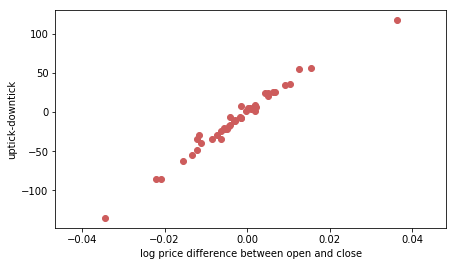

In [8]:
#14.H 緊急性取引 売り手主導・買い手主導
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    ratio=[]
    t=0
    tmp=0
    tmp2=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            price,j=sessiondata(trades,n_max,i,yymmdd,hm)
            if hm==1900 or hm==230:#データの分析-----------------------------
                trade0=float(price[0][2])
                p_open=trade0
                price2=[] #動きのある価格を保存
                length=len(price)
                uptick=0
                dwntick=0
                tt=0
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    if trade!=trade0:        #価格の動きのない取引を除外
                        price2.append([])
                        price2[tt].append(trade)
                        tt+=1
                    trade0=trade
                temp=0
                length=len(price2)
                for ii in range(2,length):
                    trade00=float(price2[ii-2][0])
                    trade0=float(price2[ii-1][0])
                    trade=float(price2[ii][0])
                    if trade>trade0 and trade!=trade00:#買い手主導
                        uptick+=1
                    if trade<trade0 and trade!=trade00:#売り手主導
                        dwntick+=1
                results.append([])
                results[t].append(np.log(trade)-np.log(p_open))
                results[t].append((uptick-dwntick))
                t+=1
            forward=i+j+1
    results=pd.DataFrame(results,columns=['pgap','tgap'])
    plt.figure(figsize=(7,4))
    plt.scatter(results.pgap,results.tgap,c='indianred')
    plt.xlabel('log price difference between open and close')
    plt.ylabel('uptick-downtick')
    
buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)  